# Смирнов Сергей Артёмович, ФПэ-01-22

## Домашнее задание №1
### Задача 1:

Построить график зависимости термического КПД от давления промежуточного перегрева водяного пара для условий примера: $P_0$0
=12 М $t_0$t
0
=5 $p_k$ 
Р
к
=5 кПа. Параметры промп $p_{\text{п.п.}}$Р
п
.
п
.
=1, 2, 3$t_{\text{п.п.}}$Па; 
t
п
.
п
.
=530 °С.:

In [20]:
import iapws
from iapws import IAPWS97 as gas
import numpy as np

In [21]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [22]:
p_0 = 12 * MPa
t_0 = 530
p_k = 5 * kPa
p_middle = {"Pпп = 1МПа": 1 * MPa,"Pпп = 2 МПа": 2 * MPa,"Pпп = 3 МПа": 3 * MPa, "Pпп = 4 МПа": 4 * MPa,"Pпп = 5 МПа": 5 * MPa,"Pпп = 6 МПа": 6 * MPa}
t_middle = 530

In [11]:
t_0 = to_kelvin(530)
t_middle = to_kelvin(t_middle)

In [23]:
def efficiency(P0,T0,P_PP,T_PP,PK):
    point_0_start = gas(P=P0 * unit, T=(T0 + 273.15))
    point_0_end = gas(P=P_PP* unit, s=point_0_start.s)
    point_1_start = gas(P=P_PP* unit, T=(T_PP + 273.15))
    point_condenser = gas(P=PK * unit, s=point_1_start.s)
    point_pump = gas(P=PK * unit, x=0)
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = (useful_energy / full_energy) * 100
    return efficiency

def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

In [24]:
efficiency_dict = {}
for i in p_middle.values():
    j = get_key(p_middle, i)
    efficiency_dict[j] = efficiency_dict.get(j, []) + [efficiency(p_0, t_0, i, t_middle, p_k)]

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Vait_\AppData\Local\Temp\ipykernel_16920\3221289679.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Зависимость $\eta$ от $p_{pp}$', fontsize=16)
C:\Users\Vait_\AppData\Local\Temp\ipykernel_16920\3221289679.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta$')


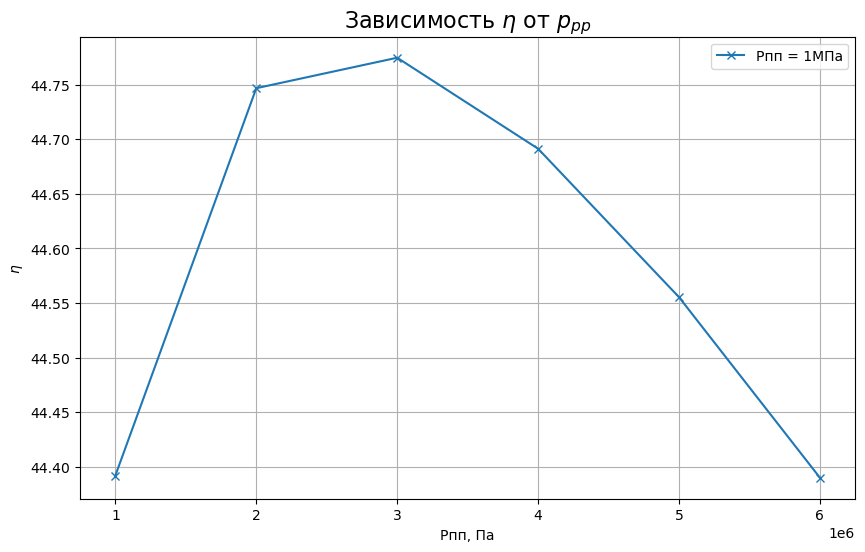

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title('Зависимость $\eta$ от $p_{pp}$', fontsize=16)
plt.xlabel('Pпп, Па')
plt.ylabel('$\eta$')
plt.plot(p_middle.values(),efficiency_dict.values(), marker='x')
plt.grid(True)
plt.legend(efficiency_dict.keys())
plt.show()

# Задача 2

Построить график изолиний термического КПД от давления промежуточного перегрева и начальной температуры для $Р_0$=12 МПа; $t_0$=530 °С; $Р_к$=5 кПа.. Графиком покрыть множество максимумов КПД. Для отрисовки прочитать [документацию](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)

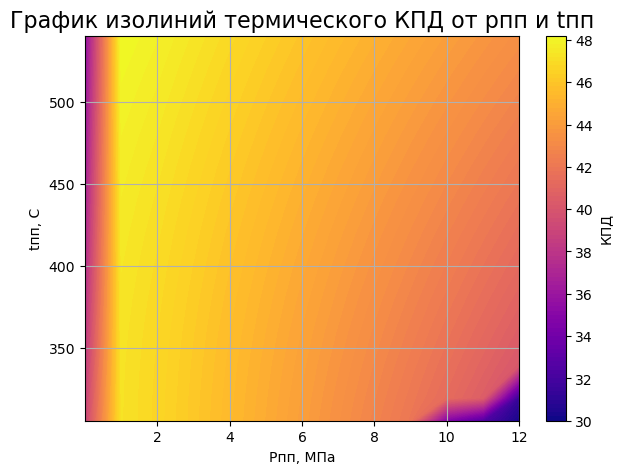

In [33]:
t0 = 530 + 273.15 #K
P0 = 12 * MPa
T_middle = []
P_middle = []
Pk = 5 * kPa


P_middle.append(Pk*unit)
for i in range(0,12):
    P_middle.append((i+1))

T0_0 = gas(P = P0*unit, T=(t0+273.15))
T0_1 = gas(P = P_middle[0], s = T0_0.s)

T_middle.append(T0_1.T)
for i in range(0,len(P_middle)-1):
    T_middle.append(300+20*(i+1))


eta = {}
for t_middle in T_middle:
    eff_value = []
    for p_middle in P_middle:
        effmat = efficiency(P0,t0,p_middle*MPa,t_middle,Pk)
        eff_value.append(effmat)
    eta[t_middle] = eff_value
fig = plt.figure(figsize=(7, 5))
axis = fig.add_subplot()


cs = axis.contourf(P_middle, T_middle, eta.values(),levels=100, cmap = 'plasma')
plt.title('График изолиний термического КПД от pпп и tпп', fontsize=16)
plt.xlabel('Pпп, МПа')
plt.ylabel('tпп, С')
plt.grid(True)

cbar = fig.colorbar(cs)
cbar.set_label('КПД')
plt.show()

# Задача 3

При удельных расходах водяного пара $d_{01}$= 2,9 кг/(кВт·ч) и $d_{02}$= 3,4 кг/(кВт·ч) оценить удельные расходы теплоты на выработку электроэнергии, приняв разность энтальпий $h_0$ – $h_{п.в.}$ = 2400 кДж/кг.

In [41]:
kW = 10**3

d_01 = 3 # kg/(kW $\cdot$ h)
d_02 = 3.4 # kg/(kW $\cdot$ h)
Delta_h_0 = 2400 # kW

N_1 = Delta_h_0 * kW #kW

mass_flow_first = d_01 * N_1 / 3600 #kg/s
mass_flow_second = d_02 * N_1 / 3600#kg/s

print(
    "Ответ на задачу 3:\n",
    round(mass_flow_first, 0), "Кг/c Для первой турбины\n",
    round(mass_flow_second, 3), "Кг/c Для второй турбины"
)

Ответ на задачу 3:
 2000.0 Кг/c Для первой турбины
 2266.667 Кг/c Для второй турбины


# Задача 4

Написать код для решения задачи оптимизации параметров промежуточного перегрева $P_{п.п.}$ и $t_{п.п.}$ для свободных начальных параметров $Р_0$, $t_0$, $Р_к$. Сделаем допущение, что начальная точка процесса расширения всегда находится в зоне перегретого пара. Решение должно выдавать параметры промежуточного перегрева и термический КПД при них. На основе этого кода собрать информацию об оптимальных давлениях промежуточного перегрева и температуры при $P_0$ от 5 до 12 МПа с шагом 1 МПа и температурой $t_0$ = 500 °С, $Р_к$=5 кПа. Сделать график функции оптимального давления промежуточного перегрева от давления $P_0$


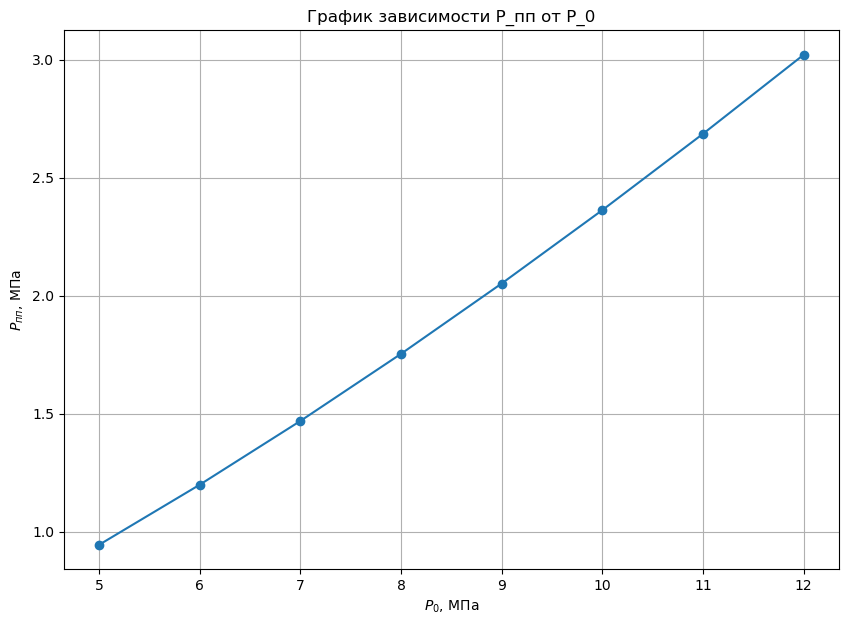

In [39]:
import iapws
from iapws import IAPWS97 as gas
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

def points_1(p_0: float, p_k: float, t_0: float, p_prom: float, t_prom: float):
    point_0_start = gas(T=t_0, P=p_0)
    point_0_end = gas(P=p_prom, s=point_0_start.s)
    point_1_start = gas(P=p_prom, T=t_prom)
    point_condenser = gas(P=p_k * unit, s=point_1_start.s)
    point_pump = gas(P=p_k * unit, x=0)
    return point_0_start, point_0_end, point_1_start, point_condenser, point_pump

def efficiency_1(point_0_start, point_0_end, point_1_start, point_condenser, point_pump) -> float:
    useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
    full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)
    efficiency = useful_energy / full_energy
    return efficiency

def optimal_params(p_0: float, t_0: float, p_k: float) -> (float, float):
    def loss_function(middle_params, p_0=p_0, t_0=t_0, p_k=p_k):
        p_div_p_0, t_div_t_0 = middle_params[0], middle_params[1]
        p_prom = p_0 * p_div_p_0
        t_prom = t_0 * t_div_t_0
        point_0_start, point_0_end, point_1_start, point_condenser, point_pump = points_1(
            p_0=p_0,
            p_k=p_k,
            t_0=to_kelvin(t_0),
            p_prom=p_prom,
            t_prom=to_kelvin(t_prom)
        )
        efficiency = efficiency_1(point_0_start, point_0_end, point_1_start, point_condenser, point_pump)
        return 1 - efficiency

    initial_params = [0.5, 0.5]
    bounds = [(0.01, 1), (0.01, 1)]
    result = minimize(loss_function, x0=initial_params, bounds=bounds, tol=1e-8)

    p_div_p_0, t_div_t_0 = result.x
    p_prom = p_div_p_0 * p_0
    t_prom = t_div_t_0 * t_0
    return p_prom, t_prom

p_0_values = {i: i for i in range(5, 13)}
t_0 = 500
p_k = 5 * kPa
p_pr = {}


for key in p_0_values:
    p_prom, _ = optimal_params(p_0_values[key], t_0, p_k)
    p_pr[key] = p_prom

# Построение графика
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(p_0_values.keys(), p_pr.values(), marker='o')
ax.grid()
ax.set_title("График зависимости P_пп от P_0")
ax.set_xlabel("$P_0$, МПа")
ax.set_ylabel("$P_{пп}$, МПа")
plt.show()
